# < Walmart Recruiting: Trip Type Classification >

## Data fields

- 타겟 데이터
    - `TripType` : 고객의 수행한 쇼핑 유형을 나타내는 카테고리 ID. TripType_999는 '기타' 카테고리 
- 특징 데이터
    - `VisitNumber` : 단일 고객에 의한 단일 매장방문에 해당하는 ID.
    - `Weekday` : 매장을 방문한 요일.
    - `Upc` : 구입한 제품의 바코드 번호.  --> 각 제품을 가리킴.
    - `ScanCount` : 구입한 제품의 개수. 음수값은 반품을 표시.
    - `DepartmentDescription` : 제품을 파는 파트에 대한 설명.
    - `FinelineNumber` : walmart가 만든 비슷한 유형의 제품끼리 묶은 카테고리. --> ?

In [12]:
train = pd.read_csv('train.csv', sep=',')
print(train.shape)
train

(647054, 7)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0
5,26,8,Friday,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0
6,26,8,Friday,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0
7,26,8,Friday,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0
8,26,8,Friday,2.238495e+09,1,PAINT AND ACCESSORIES,4501.0
9,26,8,Friday,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0


In [11]:
train[train.FinelineNumber == 1000]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
362,3,177,Friday,6.053882e+10,1,FINANCIAL SERVICES,1000.0
374,3,188,Friday,6.811315e+10,1,FINANCIAL SERVICES,1000.0
379,43,194,Friday,9.285200e+09,5,HORTICULTURE AND ACCESS,1000.0
558,3,265,Friday,6.053882e+10,1,FINANCIAL SERVICES,1000.0
1060,3,456,Friday,6.053882e+10,1,FINANCIAL SERVICES,1000.0
1086,3,465,Friday,6.053882e+10,1,FINANCIAL SERVICES,1000.0
1519,3,651,Friday,6.053882e+10,1,FINANCIAL SERVICES,1000.0
1611,3,700,Friday,6.811315e+10,1,FINANCIAL SERVICES,1000.0
1962,5,863,Friday,9.285200e+09,1,HORTICULTURE AND ACCESS,1000.0


In [13]:
# Number of unique values per column 
train.T.apply(lambda x: x.nunique(), axis=1)

TripType                    38
VisitNumber              95674
Weekday                      7
Upc                      97714
ScanCount                   39
DepartmentDescription       68
FinelineNumber            5195
dtype: int64

--> 방문유형이 38가지, 제품이 97714개

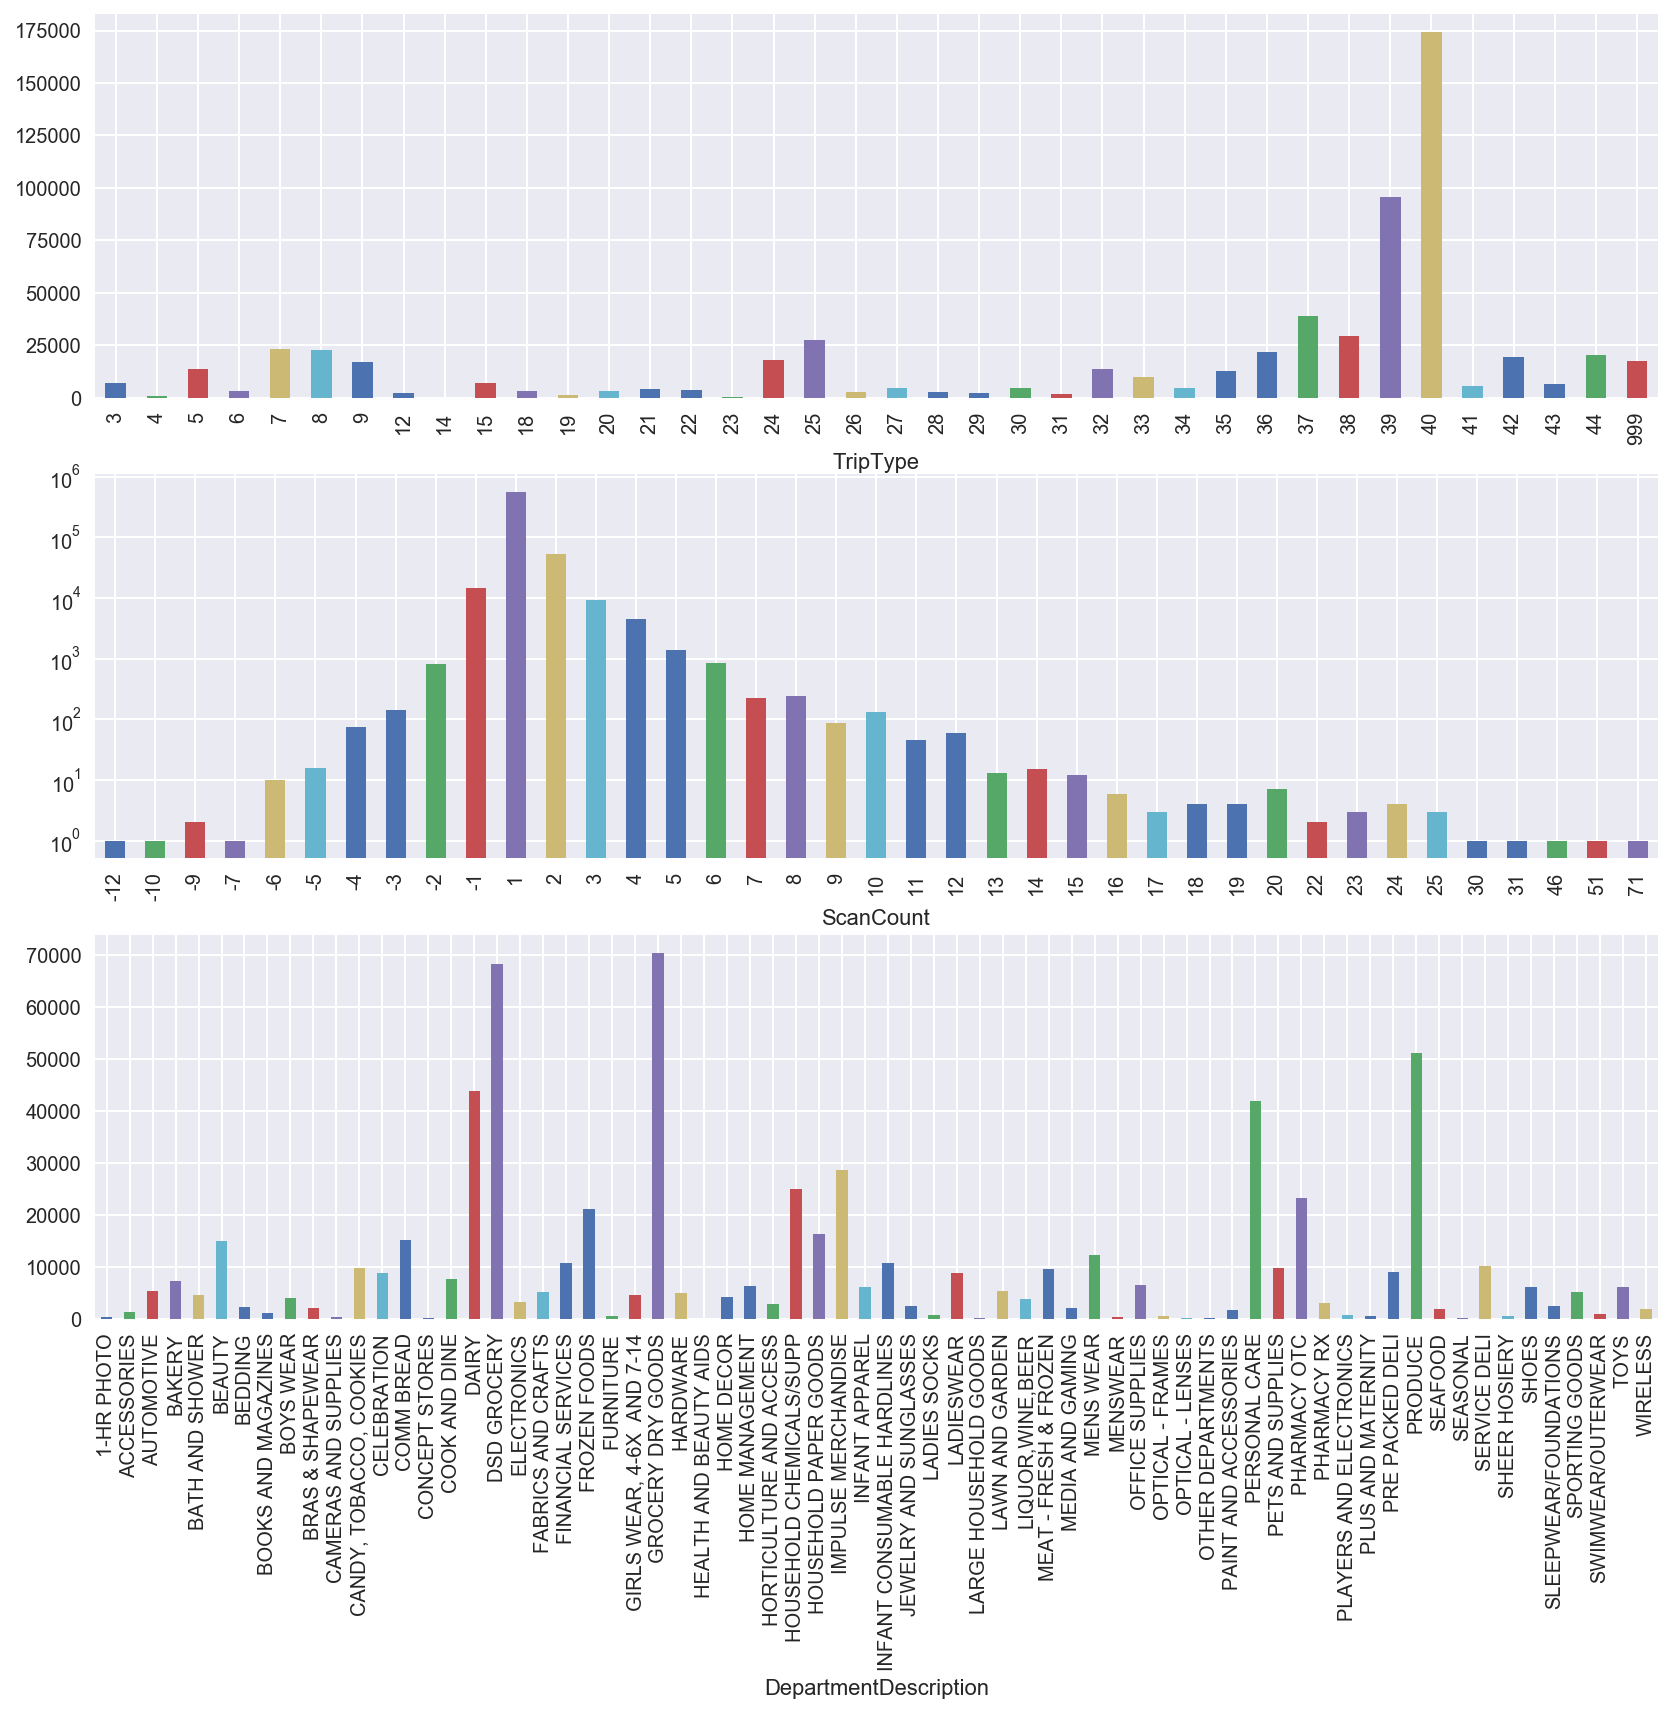

In [14]:
from matplotlib import pyplot as pl
fig = pl.figure(figsize=(14, 12))

# Plot total number of TripTypes
ax1 = fig.add_subplot(311)
train.groupby(['TripType'], as_index=False).size().plot('bar')

# Plot total number of ScanCounts
ax2 = fig.add_subplot(312)
train.groupby(['ScanCount'], as_index=False).size().plot('bar', logy=True)

# Plot total number of DepartmentDescriptions
ax3 = fig.add_subplot(313)
train.groupby(['DepartmentDescription'], as_index=False).size().plot('bar')

pl.show()

<function matplotlib.pyplot.show>

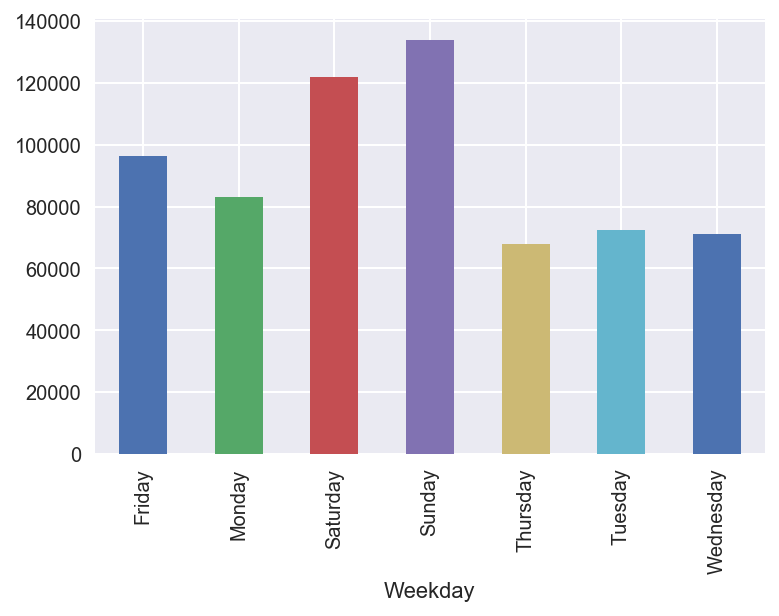

In [20]:
# Plot total number of Weekday
train.groupby(['Weekday']).size().plot('bar')
pl.show

In [ ]:
'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'